# Loan Eligibility Prediction
   

## Process Flow
1. Understanding Problem Statement
2. Hypothesis Generation
3. Getting the system ready and loading the data
4. Understanding the data
5. Exploratory Data Analysis (EDA)
   - Univariate Analysis
   - Bivariate Analysis
6. Missing Value and Outlier Treatment
7. Evaluation Metrics for classification problems
8. Model Building Part-I
9. Logistics regression using stratified k-folds cross validation
10. Feature Engineering
11. Model Building Part-II
   - Logistic Regression
   - Decision Tree
   - Random Forest
   - XGBoost
   

## 1. Understanding Problem Statement
It is a **Classification Problem** where we have to predict whether a loan would be approved or not. In a classification problem, we have to predict discrete values based on a given set of independent variables.
Classification can be of two types:
- **Binary Classification:** In this classification, we have to predict either of the two given classes. For example- classifying the gender as male ore female, predictiing the result as win or loss etc.
- **Multiclass Classification:** Here we have to classify the data into three or more classes. For example- classifying a movie's genre as comedy, action or romantic, classify fruits as oranges, apples or pears etc.

Loan Prediction is a very common real life problem that each retail bank faces atleast once in its lifetime. If done correctly, it can save a lot of man hours at the end of a retail bank.


## 2. Hypothesis Generation
After looking at the problem statement, we will now move into hypothesis generation. It is a process of listing out all the possible factors that can affect the outcome.

**What is Hypothesis Generation?**
This is a very important stage in any data science/machine learning pipeline. It involves understanding the problem in detail by brainstorming as many factors as possible which can impact the outcome. It is done by understanding the problem statement throoughly and before looking at the data.

Below are some of the factors which I think can affect the Loan Approval (dependent variable for this loan prediction problem):
- **Salary:** Applicants with high income should have more chances of loan approval.
- **Previous History:** Applicants who have repayed their previous debts should have higher chances of loan approval.
- **Loan Amount:** Loan approval should also depend on the loan amount. If the loan amount is less, chances of loan approval should be high.
- **Loan term:** Loan for less time period and less amount should have higher chances of approval.
- **EMI:** Lesser the amount to be paid monthly  to repay the loan, higher the chances of loan approval.

These are some of the factors which I think can affect the target variable, you can come up with many more factors.

## 3. Getting the system ready and loading the data

**System Specifications***
- Python - 3.7
- pandas - 0.20.3
- seaborn - 1.0.0
- sklearn - 0.19.1

#### Loading packages

In [2]:
#Loading packages

import pandas as pd
import numpy as np                   # For mathematical calculations
import seaborn as sns                # For Data Visualization
import matplotlib.pyplot as plt      # For plotiing graphs
%matplotlib inline
import warnings                      # To ignore any warnings
warnings.filterwarnings("ignore")

#### About Given Data

**Data** - For this practice problem, we have been given three csv files: train, test and sample submission.
- **Train file** will be used for training the model, i.e. our model will learn from this file. It contains all the independent variables and the target varibale.
- **Test file** contains all the independent variables, but not the target variable. We will apply the model to predict the target variable for the test data.
- **Sample Submission** file contains the format in  which we have to submit our predictions.

#### Reading Data

In [3]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

Let's make a copy of train and test data so that even if we have to make any changes in these datasets we would not lose the original datasets.

In [4]:
train_original=train.copy()
test_original=train.copy()

## 4. Undestanding the Data

#### Features present in our data

In [5]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

**Train dataset** has **12 independent variables** and **1 target variable i.e. Loan_Status**.

In [6]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

Similar features in the **test datasets** as the train datasets **except the Loan_Status**

#### Data Description

- **Variable** 	Description
- **Loan_ID** 	Unique Loan ID
- **Gender** 	Male/ Female
- **Married** 	Applicant married (Y/N)
- **Dependents** 	Number of dependents
- **Education** 	Applicant Education (Graduate/ Under Graduate)
- **Self_Employed** 	Self employed (Y/N)
- **ApplicantIncome** 	Applicant income
- **CoapplicantIncome** 	Coapplicant income
- **LoanAmount** 	Loan amount in thousands
- **Loan_Amount_Term** 	Term of loan in months
- **Credit_History** 	credit history meets guidelines
- **Property_Area** 	Urban/ Semi Urban/ Rural
- **Loan_Status** 	(Target) Loan approved (Y/N)

#### Data Types for each variable in datasets

In [7]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [8]:
test.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

We can see there are three format of data types:
- **object:** Object format means variables are **categorical**. Categorical variables in our datasets are: **Loan_ID, Gender, Married, Dependents, Education, Self_Employed, Property_Area, Loan_Status**.
- **int64:** It repesents integer variables. **ApplicantIncome** is of this format.
- **float64:** It represents the variable which have some decimal values involved. They are also **numerical variables**. Numerical variables in our datasets are - **CoapplicantIncome, LoanAmount, Loan_Amount_Term and Credit_Hisory**

#### Shape of the datasets

In [9]:
train.shape, test.shape

((614, 13), (367, 12))

- **Train Datasets:** **614 rows** and **13 columns**
- **Test Datasets:** **367 rows** and **12 columns**

## 5. Exploratory Data Analysis (EDA)

### 5.1 Univariate Analysis

It is the simplest form of analyzing data where we examine each variable individually. For categorical features, we can use **frequency table or bar plots** which will calculate the number of each category in a particular variable. For numerical features, **probability density plots** can be used to look at the distribution of the variable.

#### Target Variable (Loan_Status)
As it is a categorical variable, let us look at its frequency table, percentage distribution and bar plot

In [10]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [11]:
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

<AxesSubplot:>

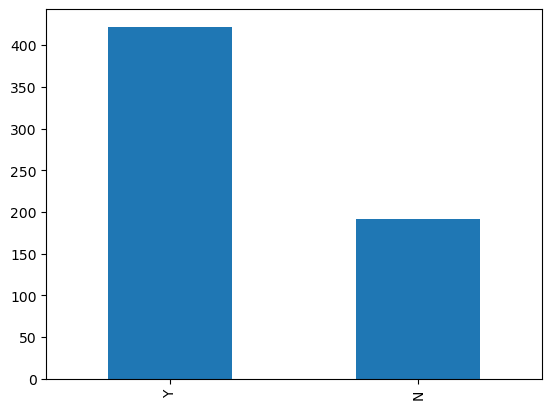

In [12]:
train['Loan_Status'].value_counts().plot.bar()

**Inference:** The loan of **422(~69%)** people out of  614 was **approved**.

Now lets visualize each variable separately. Different types of variables are Categorical, Ordinal and Numerical.
- **Categorical Features:** These features have categories **(Gender, Married, Self_Employed, Credit History, Loan_Status)**
- **Ordinal Features:** Variables in categorical features having some order involved **(Dependents, Education, Property_Area)**
- **Numerical Features:** These features have numerical values **(ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term)**

**Visualize Independent Variable (Categorical)**

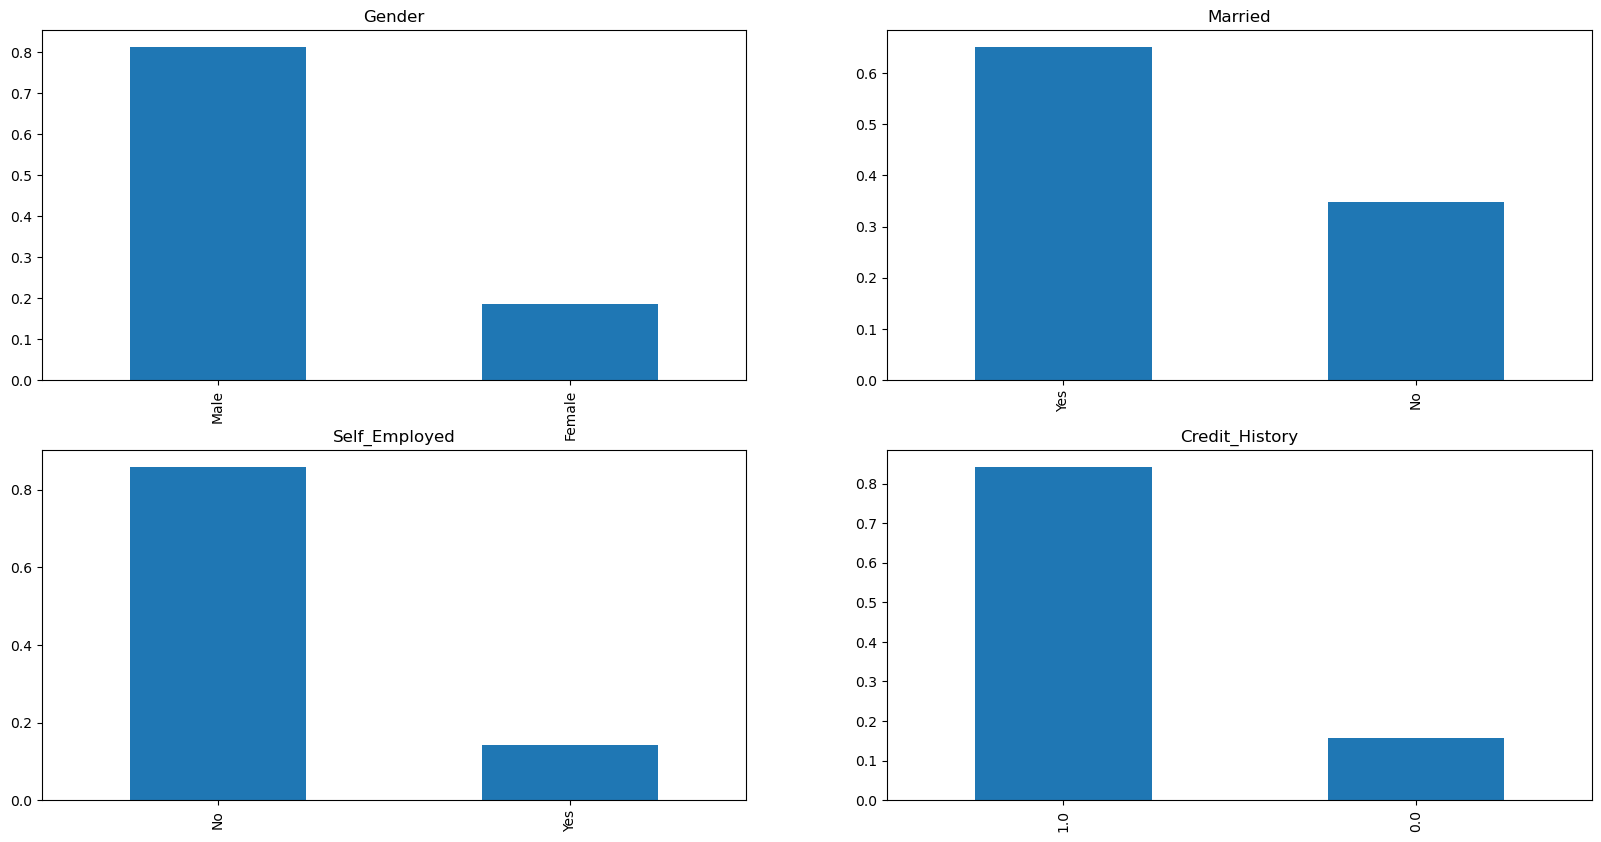

In [13]:
plt.figure(1)
plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title='Gender')
plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar(title='Married')
plt.subplot(223)
train['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_Employed')
plt.subplot(224)
train['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit_History')
plt.show()

**Inference:** It can be inferred from the above bar plots that:
- **80%** applicants in the dataset are **Male**.
- **~65%** of the applicants in the datasets are **Married**.
- **~15%** applicants in the datasets are **Self_Employed**.
- **~85%** applicants have **repaid their debts**.

**Visualize Independent Variable (Ordinal)**

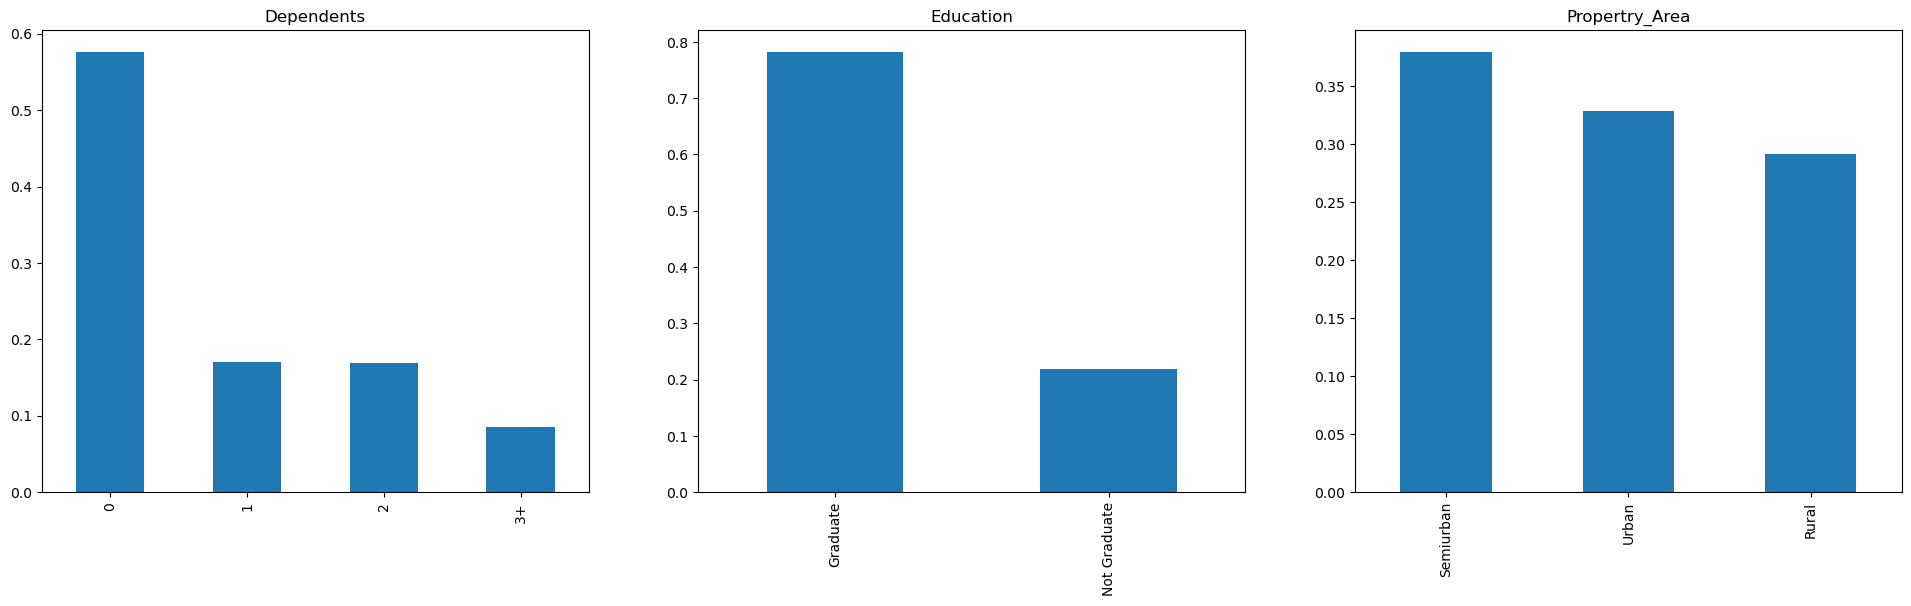

In [15]:
plt.figure(1)
plt.subplot(131)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6), title= 'Dependents')
plt.subplot(132)
train['Education'].value_counts(normalize=True).plot.bar(title= 'Education')
plt.subplot(133)
train['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Propertry_Area')
plt.show()

**Inference:** Following inferences can be made from the above bar plots:
- Most of the applicants **don't have any dependents**.
- Around **80%** of the applicants are **Graduate**.
- Most of the applicants are from **Semiurban** area

**Visualize Independent Variable (Numerical)**

- **Distibution of Applicant Income**

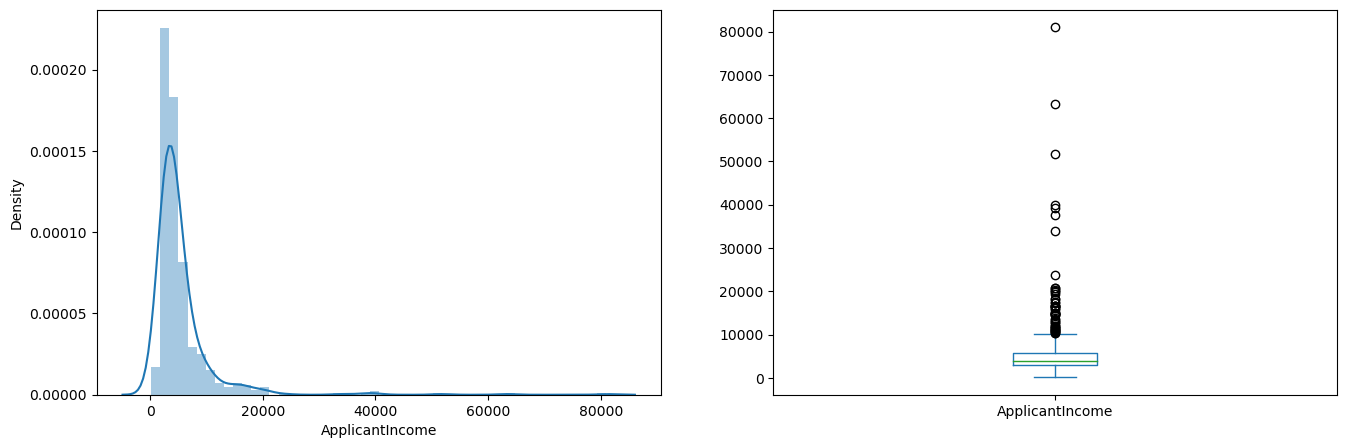

In [16]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['ApplicantIncome'])
plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(16,5))
plt.show()

**Inference:** It can be inferred that most of the data in the distribution of applicant income is towards left which means it is **not normally distributed**. We will try to make it normal in later sections as algorithms works better if the data is normally distributed.

The boxplot confirms the **presence of a lot of outliers/extreme values**. This can be attributed to the **income disparity** in the society. Part of this can be driven by the fact that we are looking at people with **different education levels**. Let us segregate them by education:

Text(0.5, 0.98, '')

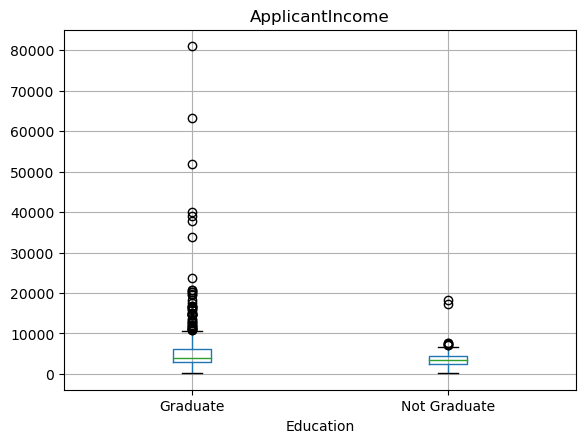

In [17]:
train.boxplot(column='ApplicantIncome', by = 'Education')
plt.suptitle("")

**Inference:** We can see there are a higher number of graduates with very high incomes, which are appearing to be the outliers.

- **Distribution of Coapplicant Income**

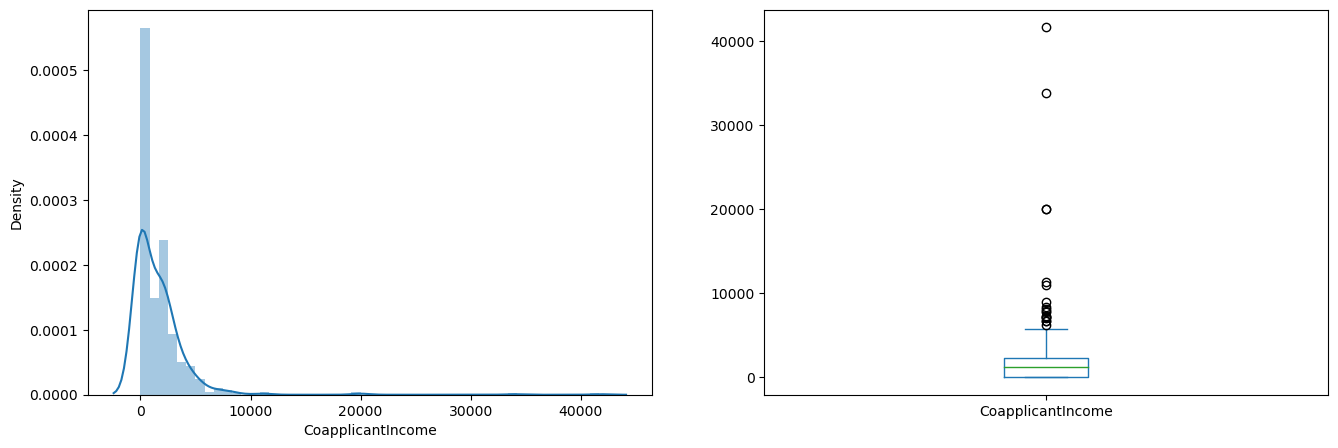

In [18]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['CoapplicantIncome'])
plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize=(16,5))
plt.show()

**Inference:** We see similar distribution as that of the applicant income. Majority of coapplicant's income ranges from **0 to 5000**. We also see a lot of outliers in the coapplicant income and it is **not normally distributed**.

- **Distribuion of Loan Amount variable**

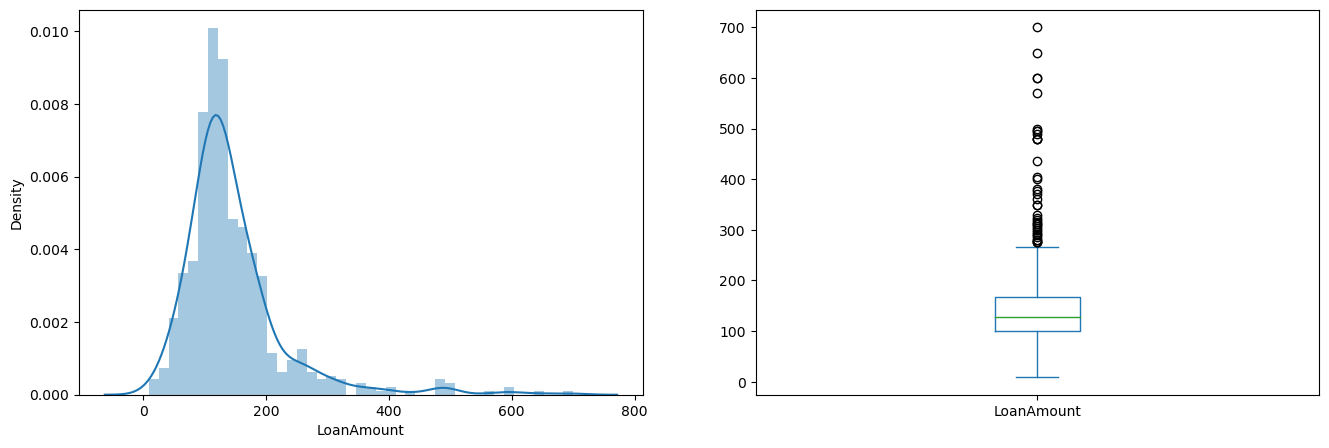

In [19]:
plt.figure(1)
plt.subplot(121)        #df=train.dropna() has not been run in this block
sns.distplot(train['LoanAmount'])
plt.subplot(122)
train['LoanAmount'].plot.box(figsize=(16,5))
plt.show()

**Inference:** We see a **lot of outliers** in this variable and the distribution is **fairly normal**.

### 5.2 Bivariate Analysis

Lets recall some of the hypothesis that we generated earlier:
- **Salary:** Applicants with high income should have more chances of loan approval.
- **Previous History:** Applicants who have repayed their previous debts should have higher chances of loan approval.
- **Loan Amount:** Loan approval should also depend on the loan amount. If the loan amount is less, chances of loan approval should be high.
- **EMI:** Lesser the amount to be paid monthly  to repay the loan, higher the chances of loan approval.

Lets try to test the above mentioned hypothesis using bivariate analysis. 

After looking at every variable individually in univariate analysis, we will now explore them again with respect to the target variable.


- **Categorical Independent Variable Vs Target Variable**
>First of all we will find the relation between **target variable and categorical independent variables**.

In [21]:
Gender=pd.crosstab(train['Gender'], train['Loan_Status'])
Gender

Loan_Status,N,Y
Gender,,
Female,37,75
Male,150,339


In [23]:
Gender.div(Gender.sum(1).astype(float), axis=0)

Loan_Status,N,Y
Gender,,
Female,0.330357,0.669643
Male,0.306748,0.693252


<AxesSubplot:xlabel='Gender'>

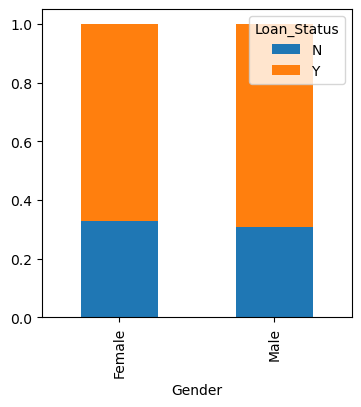

In [24]:
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind= "bar", stacked= True, figsize=(4,4))

**Inference:** It can be inferred that the proportion of male and female applicants is **more or less same** for both approved and unapproved loans.

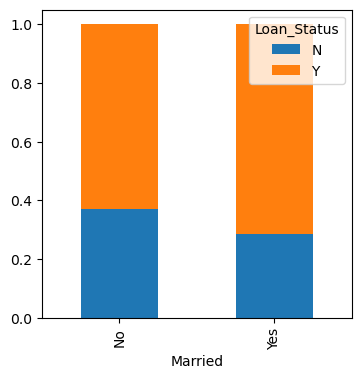

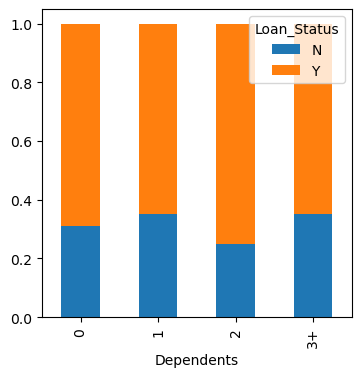

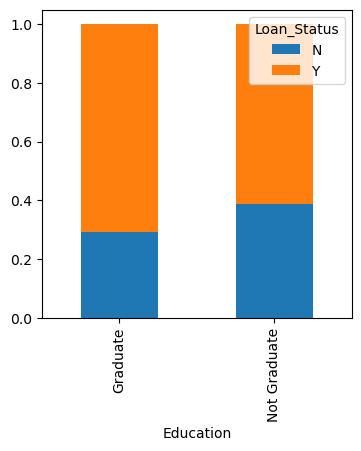

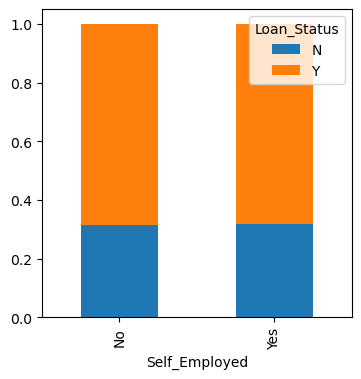

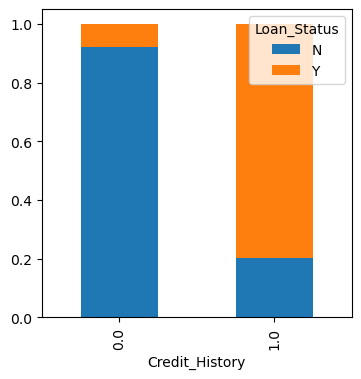

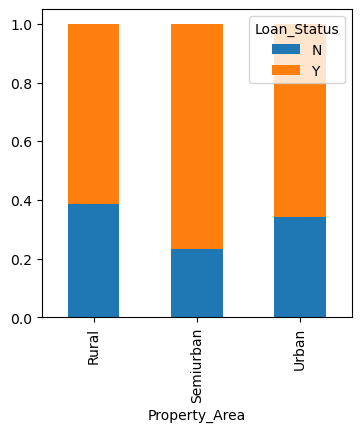

In [25]:
Married=pd.crosstab(train['Married'], train['Loan_Status'])
Dependents=pd.crosstab(train['Dependents'], train['Loan_Status'])
Education=pd.crosstab(train['Education'], train['Loan_Status'])
Self_Employed=pd.crosstab(train['Self_Employed'], train['Loan_Status'])
Credit_History=pd.crosstab(train['Credit_History'], train['Loan_Status'])
Property_Area=pd.crosstab(train['Property_Area'], train['Loan_Status'])

Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked= True, figsize=(4,4))
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked= True, figsize=(4,4))
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked= True, figsize=(4,4))
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked= True, figsize=(4,4))
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked= True, figsize=(4,4))
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked= True, figsize=(4,4))
plt.show()

**Inference:** 
- Proportion of **Married** applicants is **higher** for the approved loans.
- Distribution of applicants with **1 or 3+ dependents** is **similar** across both categories of Loan_Status
- There is **nothing significant** we can infer from **Self_Employed Vs Loan_Status** plot.
- It seems people with **credit history as 1** are more likely to get their loans **approved**.
- Proportion of loans getting approved in **Semiurban** area  is **higher** compared to that in Rural or Urban areas.

- **Numerical Independent Variable Vs Target Variable**
>We will try to find the mean income of the people for which loan has been approved Vs mean income of people for which loan has not been approved.

- - **ApplicantIncome Vs Loan_Status Analysis**

<AxesSubplot:xlabel='Loan_Status'>

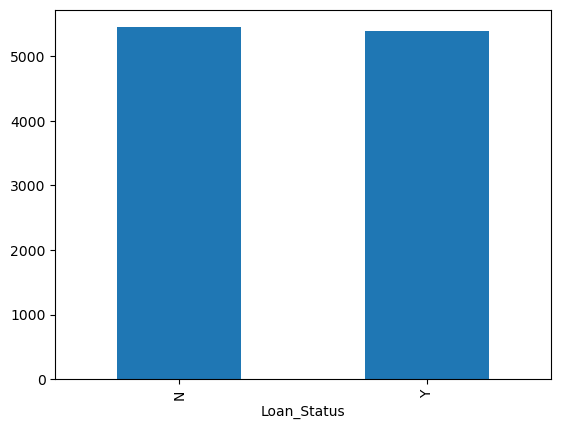

In [26]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

Here the Y-axis represents the mean applicant income. We don't see any change in the mean income. So, let's make bins for the applicant income variable based on the values in it and analyse the corresponding loan status for each bin.

Text(0, 0.5, 'Percentage')

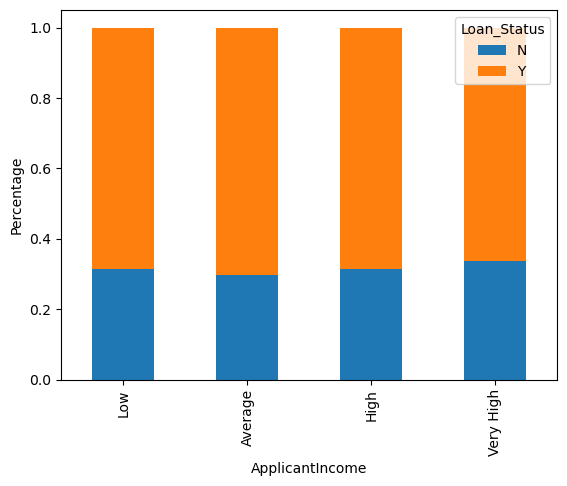

In [27]:
bins=[0,2500,4000,6000,81000]
group=['Low','Average', 'High','Very High']
train['Income_bin']=pd.cut(train['ApplicantIncome'], bins, labels=group)

Income_bin=pd.crosstab(train['Income_bin'], train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked= True)
plt.xlabel('ApplicantIncome')
plt.ylabel('Percentage')

**Inference:** It can be inferred that ApplicantIncome **does not affect** the chances of loan approval which **contradicts our hypothesis** in which we assumed that if the applicant income is high the chances of loan approval will also be high.

- - **CoapplicantIncome vs Loan_Status Analysis**

Text(0, 0.5, 'Percentage')

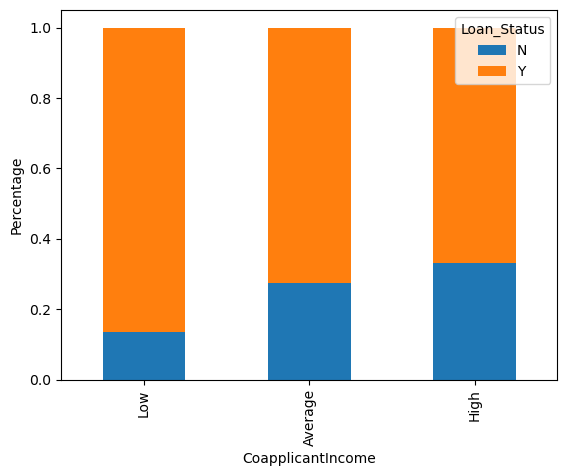

In [28]:
bins=[0,1000,3000,42000]
group=['Low','Average','High']
train['Coapplicant_Income_bin']=pd.cut(train['CoapplicantIncome'], bins, labels=group)

Coapplicant_Income_bin=pd.crosstab(train['Coapplicant_Income_bin'], train['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked= True)
plt.xlabel('CoapplicantIncome')
plt.ylabel('Percentage')

**Inference:** It shows that if *coapplicant's income* is **less** the *chances of loan approval* are **high**. But this does not look right. The possible reason behind this may be that most of the applicants  don't have any coapplicant so the coapplicant income for such applicants is 0 and hence the loan approval is not dependent on it. So, we can make a new variable in which we will combine the applicant's and coapplicant's income to visualize the combined effect of income on loan approval.

Text(0, 0.5, 'Percentage')

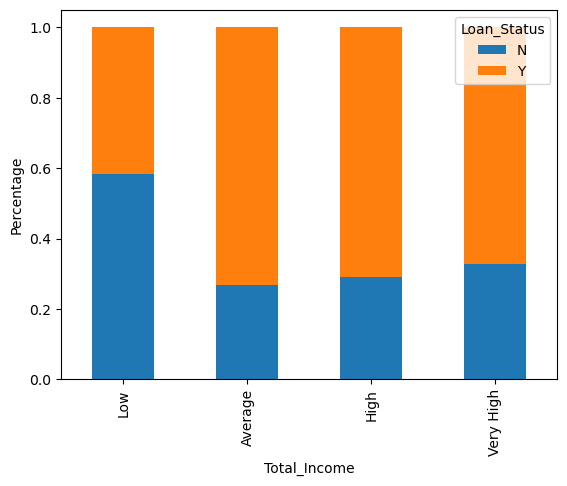

In [29]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High','Very High']
train['Total_Income_bin']=pd.cut(train['Total_Income'], bins, labels=group)

Total_Income_bin=pd.crosstab(train['Total_Income_bin'], train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Total_Income')
plt.ylabel('Percentage')

**Inference:** We can see that Proportion of *loans getting approved* for *applicants having* **low Total_Income** is very **less** as compared to that of applicants with Average, High and Very High.

- - **LoanAmount vs Loan_Status Analysis**

Text(0, 0.5, 'Percentage')

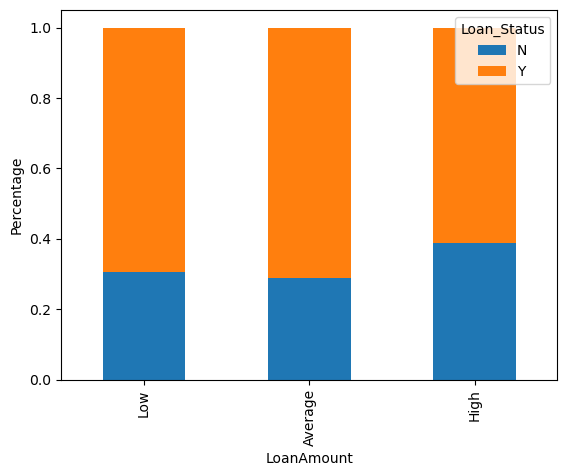

In [30]:
bins=[0,100,200,700]
group=['Low','Average','High']
train['LoanAmount_bin']=pd.cut(train['LoanAmount'], bins, labels=group)

LoanAmount_bin=pd.crosstab(train['LoanAmount_bin'], train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('LoanAmount')
plt.ylabel('Percentage')

**Inference:** It can be seen that the proportion of *approved loan* is **higher** for **Low and Average Loan Amoun**t as compared to that of High Loan Amount which **supports our hypothesis** in which we considered that the chances of loan approval will be high when the loan amount is less.

Let's drop the bins which we created for the exploration part. We will change the 3+ in dependents variable to 3 to make it a numerical variable. We will also convert the target variable's categories into 0 and 1 so that we can find its correlation with numerical variables. One more reason to do so is few models like logistic regression takes only numeric values as input. We will replace N with 0 and Y with 1.

In [31]:
train=train.drop(['Income_bin', 'Coapplicant_Income_bin', 'LoanAmount_bin', 'Total_Income_bin', 'Total_Income'], axis=1)

In [32]:
train['Dependents'].replace('3+', 3, inplace=True)
train['Loan_Status'].replace('N', 0, inplace=True)
train['Loan_Status'].replace('Y', 1, inplace=True)

Now lets look at the correlation between all the numerical variables. We will use the **heat map** to visualize the correlation. Heatmaps visualize data through variations in coloring. The variables with darker color means their correlation is more.

<AxesSubplot:>

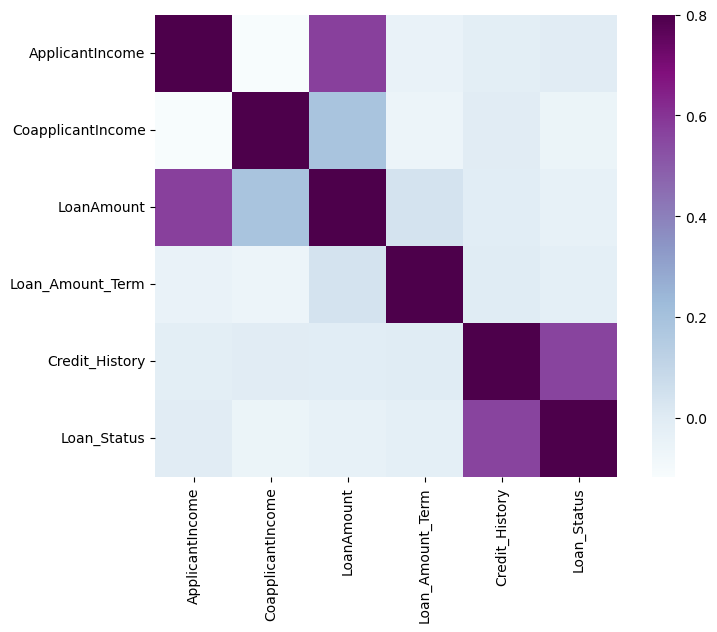

In [40]:
matrix=train.corr()
ax=plt.subplots(figsize=(9,6))
sns.heatmap(matrix, vmax=0.8, square=True, cmap="BuPu")

**Inference:** We see that the most correlated variables are **(ApplicantIncome-LoanAmount)** and **(Credit_History-Loan_Status)**. LoanAmount is also correlated with CoapplicantIncome.

## 6. Missing Value and Outlier Treatment

After exploring all the variables in our data, we can now impute the missing values and treat the outliers because missing data and outliers can have adverse effect on the model performance

#### Missing Value Imputation
Let's list out feature-wise count of missing values

In [41]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

**Inference:** There are missing values in Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term and Credit_History features.

We will treat the missing values in all the features one by one.
We can consider these methods to fill the missing values:
- **For numerical variable:** Imputation using mean or median
- **For Categorical variable:** Imputation using mode

There are very less missing values in Gender, Married, Dependents, Credit_History and Self_Employed features so we can fill them using the mode of the features.

In [42]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

Now let's try to find a way to fill the missing values in Loan_Amount_Term. We will look at the value countof the Loan amount term variable

In [43]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

It can be seen that in loan amount term variable, the value of 360 is repeating the most. So, we will replace the missing values in this variable using the mode of this variable.

In [44]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

Now we will see the LoanAmount variable. As it is a numerical variable, we can use mean or median to impute the missing values. We will use median to fill the null values as earlier we saw that loan amount have outliers so the mean will not be the proper approach as it is highly affected by the presence of outliers.

In [45]:
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

Now lets check whether all the missing values are filled in the dataset.

In [46]:
train.isnull().sum()     #Checking the above operation completion

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

As we can see that all the missing values have been filled in the test dataset. Let's fill all the missing values in the test dataset too with the same approach.

In [47]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [48]:
test['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
test['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
test['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
test['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [49]:
test.isnull().sum()     #Checking the above operation completion

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

#### Outlier Treatment

As we saw earlier in Univariate analysis, LoanAmount contains outliers so we have to treat them as the presence of outliers affects the distribution of the data. Let's examine what can happen to a data set with outliers.
it can be seen that having outliers often has a significant effect on the mean and standard deviation and hence affecting the distribution. We must  take steps to remove outliers from our datasets.

Due to these outliers bulk of the data in the **loan amount** is at the left and the right tail is longer. This is called **right skewness**. One way to remove the skewness is by doing the **log transformation**. As we take the log transformation, it does not affect the smaller values much, but reduces the larger values. So, we get a distribution similar to normal distribution.
Let's visualize the effect of log transformation. We will do the similar changes to the test file simultaneously.

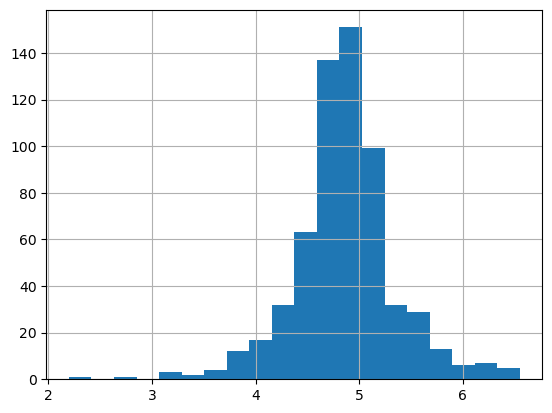

In [50]:
train['LoanAmount_log'] = np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)

test['LoanAmount_log'] = np.log(test['LoanAmount'])

Now the distribution looks much closer to normal and effect of extreme value has been significantly subsided. Let's build a logistic regression model and make predictions for the test datasets.

## 7. Evaluation Metrics for Classification Problems

The process of model building is not complete without evaluation of model's performance. Suppose we have the predictions from the model, how can we decide whether the predictions are accurate ? We can plot the results and compare them with the actual values i.e. calculate the distance between the predictions and actual values. Lesser this distance more accurate will be the predictions. Since this is a classification problem, we can evaluate our models using any one of the following evaluation metrics:
- **Accuracy:** Let us understand it using the confusion matrix which is a tabular representation o Actual Vs Predicted values. This is how a confusion matrix looks like.



- True Positive - Targets which are actually True(Y) and we have predicted them True(Y)
- True Negative
- False Positive
- False Negative

Using this value we can canculate the accuracy of the model. The accuarcy is given by:



- **Precision:** It is a measure of correctness achieved in True Prediction i.e. of observation


## Theory of this parts need to be completed

## 8. Model Building : Part I

Let us make our first model to predict the target variable. We will start with Logistic Regression which is used for predicting binary outcome.

- Logistic Regression is a classification algorithm. It is used to predict a binary outcome (1/0, Yes/No, True/False) given a set of independent variables.
- Logistic Regression is an estimation of **Logit function**. Logit function is simply a log of odds in favor of the event.
- This function creates a **S-shaped curve** with the probability estimate, which is very similar to the required step wise function.


Lets drop the Loan_ID variable as it do not have any effect on the loan status. We will do the same changes to the test dataset which we did for the training dataset.

In [55]:
train = train.drop('Loan_ID', axis=1)
test = test.drop('Loan_ID', axis=1)

In [56]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1,4.852030
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0,4.852030
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1,4.189655
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1,4.787492
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1,4.948760


In [57]:
test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,4.700480
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,4.836282
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,5.337538
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban,4.605170
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,4.356709


We will use **scikit-learn(sklearn)** for making different models which is an open source library for Python. It is one of the most efficient tool which contains many inbuilt functions that can be used for modelling in Python.

Sklearn requires the target variable in a separate dataset. So, we will drop out target variable from the train dataset and save it in another dataset.

In [58]:
X = train.drop('Loan_Status',1)
y = train.Loan_Status

In [59]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,4.852030
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,4.852030
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,4.189655
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,4.787492
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,4.948760


In [60]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

Now we will make **dummy variables(One Hot Encoding)** for the categorical variables. Dummy variables turns categorical variables into a series of 0 and 1, making them lot easier to quantify and compare. Let us understand the process of dummies first:
- Consider the "General" variable. It has two classes, Male and Female.
- As Logistic Regression takes only the numerical values as input, we have to change male and female into numerical value.
- Once we apply dummies to this variable, it will convert the "Gender" variable into two variables(Gender_Male and Gender_Female), one for each class, i.e. Male and Female.
- Gender_Male will have a value of 0 if the gender is Female and a value of 1 if the gender is Male.

In [61]:
X = pd.get_dummies(X)

In [62]:
X

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,128.0,360.0,1.0,4.852030,0,1,1,0,...,1,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,4.852030,0,1,0,1,...,0,1,0,1,0,1,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,4.189655,0,1,0,1,...,1,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.0,360.0,1.0,4.787492,0,1,0,1,...,1,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.0,360.0,1.0,4.948760,0,1,1,0,...,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0,4.262680,1,0,1,0,...,1,0,0,1,0,1,0,1,0,0
610,4106,0.0,40.0,180.0,1.0,3.688879,0,1,0,1,...,0,0,0,1,0,1,0,1,0,0
611,8072,240.0,253.0,360.0,1.0,5.533389,0,1,0,1,...,0,1,0,1,0,1,0,0,0,1
612,7583,0.0,187.0,360.0,1.0,5.231109,0,1,0,1,...,0,0,1,1,0,1,0,0,0,1


In [63]:
train = pd.get_dummies(train)

In [64]:
train

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,LoanAmount_log,Gender_Female,Gender_Male,Married_No,...,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,128.0,360.0,1.0,1,4.852030,0,1,1,...,1,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,0,4.852030,0,1,0,...,0,1,0,1,0,1,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,1,4.189655,0,1,0,...,1,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.0,360.0,1.0,1,4.787492,0,1,0,...,1,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.0,360.0,1.0,1,4.948760,0,1,1,...,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0,1,4.262680,1,0,1,...,1,0,0,1,0,1,0,1,0,0
610,4106,0.0,40.0,180.0,1.0,1,3.688879,0,1,0,...,0,0,0,1,0,1,0,1,0,0
611,8072,240.0,253.0,360.0,1.0,1,5.533389,0,1,0,...,0,1,0,1,0,1,0,0,0,1
612,7583,0.0,187.0,360.0,1.0,1,5.231109,0,1,0,...,0,0,1,1,0,1,0,0,0,1


In [65]:
test = pd.get_dummies(test)

In [66]:
test

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5720,0,110.0,360.0,1.0,4.700480,0,1,0,1,...,0,0,0,1,0,1,0,0,0,1
1,3076,1500,126.0,360.0,1.0,4.836282,0,1,0,1,...,1,0,0,1,0,1,0,0,0,1
2,5000,1800,208.0,360.0,1.0,5.337538,0,1,0,1,...,0,1,0,1,0,1,0,0,0,1
3,2340,2546,100.0,360.0,1.0,4.605170,0,1,0,1,...,0,1,0,1,0,1,0,0,0,1
4,3276,0,78.0,360.0,1.0,4.356709,0,1,1,0,...,0,0,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,4009,1777,113.0,360.0,1.0,4.727388,0,1,0,1,...,0,0,1,0,1,0,1,0,0,1
363,4158,709,115.0,360.0,1.0,4.744932,0,1,0,1,...,0,0,0,1,0,1,0,0,0,1
364,3250,1993,126.0,360.0,1.0,4.836282,0,1,1,0,...,0,0,0,1,0,1,0,0,1,0
365,5000,2393,158.0,360.0,1.0,5.062595,0,1,0,1,...,0,0,0,1,0,1,0,1,0,0


Now we will train the model on training dataset and make predictions for the test dataset. But can we validate these predictions ? One way of doing this is we can divide our train dataset into two parts: **train and validation**. We can train the model on this train part and using that make predictions for the validation part. In this way, we can validate our predictions as we have the true predictions for the validation part (which we do not have for the test dataset).

We will use the train_test_split function  from sklearn to divide our train dataset. So, first let us import train_test_split.

In [120]:
from sklearn.model_selection import train_test_split

In [132]:
x_train, x_cv, y_train, y_cv = train_test_split(X,y,test_size = 0.3, random_state=5)

In [133]:
x_train.shape, x_cv.shape, y_train.shape, y_cv.shape

((429, 21), (185, 21), (429,), (185,))

The dataset has been divided into training and validation part. Let us import Logistic Regression and accuracy_score from sklearn and fit the logistic regression model.

In [134]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [135]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1, penalty='12', random_state=5, solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

LogisticRegression(multi_class='ovr', n_jobs=1, penalty='12', random_state=5,
                   solver='liblinear')

Hence, the **C parameter represents inverse of regularization strength**. Regularization is applying a penalty to increasing the magnitude of parameter values in order to reduce overfitting. Smaller values of C specify stronger regularization.

Let us **predict the Loan_Status for validation set** and calculate its accuracy

In [136]:
pred_cv = model.predict(x_cv)

In [137]:
pred_cv

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1], dtype=int64)

Let us calculate how accurate our predictions are by **calculating the accuracy**

In [138]:
accuracy_score(y_cv,pred_cv)

0.8054054054054054

### Inference: So, our predictions are **almost 80% accurate**, i.e. we have identified 80% of the loan status correctly.

Let's make **prediction for the test dataset**

In [139]:
pred_test = model.predict(test)

In [140]:
pred_test

array([1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,

Lets import the submission file which we have to submit on the solution checker.

In [141]:
submission = pd.read_csv("sample_submission.csv")

In [142]:
submission

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N
...,...,...
362,LP002971,N
363,LP002975,N
364,LP002980,N
365,LP002986,N


We only need the Loan_ID and the corresponding Loan_Status for the final submission. We will fill these columns with the **Loan_ID of test dataset** and the **predictions that we made, i.e. pred_test** respectively.

In [143]:
submission['Loan_Status'] = pred_test
submission['Loan_ID'] = test_original['Loan_ID']

In [144]:
submission

,Loan_ID,Loan_Status
0,LP001002,1
1,LP001003,1
2,LP001005,1
3,LP001006,1
4,LP001008,1
...,...,...
362,LP002175,1
363,LP002178,1
364,LP002180,1
365,LP002181,1


Remember we need predictions in Y and N. So, let's convert 1 and 0 to Y and N.

In [145]:
submission['Loan_Status'].replace(0,'N', inplace=True)
submission['Loan_Status'].replace(1, 'Y', inplace=True)

In [146]:
submission

,Loan_ID,Loan_Status
0,LP001002,Y
1,LP001003,Y
2,LP001005,Y
3,LP001006,Y
4,LP001008,Y
...,...,...
362,LP002175,Y
363,LP002178,Y
364,LP002180,Y
365,LP002181,Y


In [147]:
submission.value_counts()

Loan_ID   Loan_Status
LP001002  Y              1
LP001841  Y              1
LP001835  N              1
LP001825  Y              1
LP001824  Y              1
                        ..
LP001426  Y              1
LP001422  N              1
LP001421  N              1
LP001405  N              1
LP002187  Y              1
Length: 367, dtype: int64

Finally we will convert the submission to .csv format and make submission to check the accuracy on the leaderboard.

In [148]:
pd.DataFrame(submission, columns=['Loan_ID', 'Loan_Status']).to_csv('Loan_Logistic.csv', index=False)

Now submission file is ready upload on the leaderboard.